In [61]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [62]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## Activation Functions

In [63]:
def activation_functions(vector, function):
    
    if(function == 'sigmoid'):
        return 1.0/(1 + np.exp(-vector))
    

In [64]:
def reverse(list_):
    
    for i in range(0, len(list_)/2):
        temp = list_[i]
        list_[i] = list_[len(list_) -1 -i]
        list_[len(list_)-1-i] = temp

## Updating weights

In [125]:
def update_weights(weights, labels, final_output, outputs, old_gradients , gradient_type, update, s, ite):

    if(gradient_type == 'stochastic'):
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma

            gradients = np.multiply(carry_factor, weights[i].T).T 

            learning_rate = 0.3

            carry_factor = np.sum(carry_factor)

            weights[i] = weights[i] - learning_rate*gradients
            


    elif(gradient_type == 'momentum'):
        
#         print "momentum"
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        gradients_list = []
        
        final_gradients = []
        
        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma

            gradients = np.multiply(carry_factor, weights[i].T).T 

            learning_rate = 0.003
            
            alpha = 0.002

            carry_factor = np.sum(carry_factor)
            
            sub_factor = 0
            
            if(update == 'no'):
                
                sub_factor = - (learning_rate * (gradients))
                
                old_gradients.append(gradients)
                
            elif(update =='yes'):
                
                sub_factor = (alpha*old_gradients[i]) - (learning_rate*gradients)
                
                old_gradients[i] = (alpha*old_gradients[i]) - (learning_rate*gradients)

            weights[i] = weights[i] + sub_factor
            
        if(update =='no'):
            
            reverse(old_gradients)
            
    
    elif( gradient_type == 'nesterov momentum'):

#         print "momentum"
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        gradients_list = []
        
        final_gradients = []
        
        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma
            
            if(update == 'no'):

                gradients = np.multiply(carry_factor, weights[i].T).T 
                
            elif(update == 'yes'):
                
                gradients = np.multiply(carry_factor, (weights[i] + old_gradients[i]).T).T 
                

            learning_rate = 0.003
            
            alpha = 0.002

            carry_factor = np.sum(carry_factor)
            
            sub_factor = 0
            
            if(update == 'no'):
                
                sub_factor = - (learning_rate * (gradients))
                
                old_gradients.append(gradients)
                
            elif(update =='yes'):
                
                sub_factor = (alpha*old_gradients[i]) - (learning_rate*gradients)
                
                old_gradients[i] = (alpha*old_gradients[i]) - (learning_rate*gradients)

            weights[i] = weights[i] + sub_factor
            
        if(update =='no'):
            
            reverse(old_gradients)
            
    
    elif(gradient_type == 'adagrad'):
    
#         print "momentum"
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        gradients_list = []
        
        final_gradients = []
        
        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma

            gradients = np.multiply(carry_factor, weights[i].T).T 

            learning_rate = 0.003
            
            alpha = 0.002

            carry_factor = np.sum(carry_factor)
            
            sub_factor = 0
            
            if(update == 'no'):
                
                sub_factor = (-(learning_rate)/(alpha + gradients**2)) * gradients 
                
                old_gradients.append(gradients**2)
                
            elif(update =='yes'):
                
                sub_factor = (-(learning_rate)/(alpha + np.sqrt(old_gradients[i]))) * gradients
                
                old_gradients[i] = (old_gradients[i]) + (gradients)**2

            weights[i] = weights[i] + sub_factor
            
        if(update =='no'):
            
            reverse(old_gradients)  
            
    
    elif(gradient_type == 'RMS prop'):
    
#         print "momentum"
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        gradients_list = []
        
        s_list = []
        
        final_gradients = []
        
        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma

            gradients = np.multiply(carry_factor, weights[i].T).T 

            learning_rate = 0.003
            
            alpha = 0.002

            carry_factor = np.sum(carry_factor)
            
            sub_factor = 0
            
            p1 = 0.3
            
            if(update == 'no'):
                
                sub_factor = (-(learning_rate)/(alpha + gradients**2)) * gradients 
                
                old_gradients.append(gradients**2)
                
#                 s.append(gradients)
                
            elif(update =='yes'):
                
                sub_factor = (-(learning_rate)/(alpha + np.sqrt(old_gradients[i]))) * gradients
                
                old_gradients[i] = (p1*(old_gradients[i])) + ((1-p1)*(gradients)**2)
                
#                 s[i] = (p2*s[i]) - ((1-p2)*s[i])
                

            weights[i] = weights[i] + sub_factor
            
        if(update =='no'):
            
            reverse(old_gradients)
            
            reverse(s)
            
            
    elif(gradient_type == 'adam'):
        
#         print "momentum"
        
        carry_factor = -2*(labels - final_output)

        gradients = []

        gradients_list = []
        
        final_gradients = []
        
        for i in range(len(weights)-1, -1, -1):

            d_sigma = activation_functions(outputs[i], 'sigmoid') * ( 1 - activation_functions(outputs[i] , 'sigmoid'))

            carry_factor = carry_factor * d_sigma

            gradients = np.multiply(carry_factor, weights[i].T).T 

            learning_rate = 0.003
            
            alpha = 0.002

            carry_factor = np.sum(carry_factor)
            
            sub_factor = 0
            
            p1 = 0.3
            
            p2 = 0.4
            
            if(update == 'no'):
                
                sub_factor = (-(learning_rate)/(alpha + gradients**2)) * gradients 
                
                old_gradients.append(gradients**2)
                
                s.append(gradients)
                
            elif(update =='yes'):
                
                old_gradients[i] = old_gradients[i]/(1 - p1*ite)
                
                s[i] = s[i]/(1 - p2*ite)
                
                sub_factor = (-(learning_rate)/(alpha + (old_gradients[i]))) * gradients
                
                old_gradients[i] = (p1*(old_gradients[i])) + ((1-p1)*((gradients)**2))
                
#                 s[i] = p2*s[i] - (1- p2)*s[i]

            weights[i] = weights[i] + sub_factor
            
        if(update =='no'):
            
            reverse(old_gradients)
            
            reverse(s)
            

## Single Node


In [66]:
def node(vector, weight_update, update):
    if(update == 'no'):
        weight = np.random.rand(len(vector) + 1)
    elif(update == 'yes'):
        weight = weight_update
    
    bias = weight[-1]
    
    dot_out = (np.dot(weight[0:len(weight)-1], vector)/1000000000 + bias)
    
    return weight, activation_functions(dot_out, 'sigmoid')

## For one Layer

In [67]:
def layer(vector, layer_ANN, weights_update, update):
    
    out_vector = np.empty(layer_ANN['kernels'])
    layer_weights = np.empty([layer_ANN['kernels'], len(vector)+1])
    for i in range(0,layer_ANN['kernels']):
        
        if(update == 'yes'):
            weight, out_vector[i] = node(vector,weights_update[i], update)
        elif(update == 'no'):
            weight, out_vector[i] = node(vector,[], update)
        
        layer_weights[i] = weight
    
    return out_vector, layer_weights

## For multiple Layers

In [68]:
def multi_layer_perceptron(vector,label, layers_ANN, weights_update , update):
    
    final_vector = []
    outputs = []
    layers_weights = []
    
    for i in range(0, len(layers_ANN)):
        
        if(update == 'yes'):
            temp_output, weights = layer(vector, layers_ANN[i], weights_update[i], update)
        elif(update == 'no'):
            temp_output, weights = layer(vector, layers_ANN[i], [] , update)
            
        
        vector = temp_output
        layers_weights.append(weights)
        outputs.append(temp_output)
        final_vector = temp_output
    
    return final_vector, layers_weights, outputs
    

## Define everything below

(28, 28)


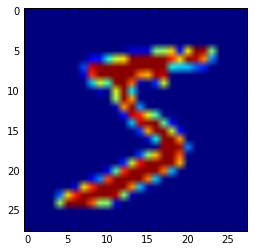

In [69]:
plt.imshow(x_train[0])
print x_train[0].shape
img = x_train[0].flatten()

In [70]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST data/", one_hot=True)
X_train = np.vstack([img.reshape((28, 28)) for img in mnist.train.images])
y_train = mnist.train.labels
X_test = np.vstack([img.reshape(28, 28) for img in mnist.test.images])
y_test = mnist.test.labels
del mnist

Extracting MNIST data/train-images-idx3-ubyte.gz
Extracting MNIST data/train-labels-idx1-ubyte.gz
Extracting MNIST data/t10k-images-idx3-ubyte.gz
Extracting MNIST data/t10k-labels-idx1-ubyte.gz


In [71]:
x_train = []
for i in range(0, len(X_train), 28):
    x_train.append(X_train[i:i+28, :])
    
x_test = []
for i in range(0, len(X_test), 28):
    x_test.append(X_test[i:i+28, :])

In [72]:
layers_ANN = {
    
    0:{'type':'input_layer', 'kernels': 5, 'activation':'no' },
    
    1:{'type':'hidden_layer', 'kernels': 15, 'activation':'yes' },
    
    2:{'type':'hidden_layer', 'kernels': 3, 'activation':'yes' },
    
    3:{'type':'output_layer', 'kernels': 10, 'activation':'yes' }, 
    
}

In [73]:
print len(x_train)
print len(y_train)


update = 'yes'

# x = []

55000
55000


In [128]:
errors_epoch = []
epochs = 5

weights = []

iter_weights = []

old_gradients = []

s = []
for j in range(0, epochs):
    errors = []
    
    
    for i in range(0, 5000):
        img = x_train[i].flatten()/100
#         print img

        if(i==0):
            update = 'no'

        k, w, outputs = multi_layer_perceptron(img, y_train[i], layers_ANN, weights, update)

        weights = w

        errors.append( np.sum((k - y_train[i])) )

        update_weights(weights, y_train[i], k, outputs, old_gradients,  'adam', update, s, i)

        update = 'yes'
        
        iter_weights.append(weights)
        
    errors_epoch.append(np.sum(errors))
#     print np.sum(errors)


/home/saurav/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [84]:
x = np.linspace(0, len(errors_epoch)-1, len(errors_epoch))
print errors_epoch

[20023.781589944752, 20027.92988268465, 20021.271129172863, 20020.999929525995, 20023.04268679548]


### Note

- plots are drawn as
    
    x-axis = epochs    
    y-axis = errors
    

#### Stochastic

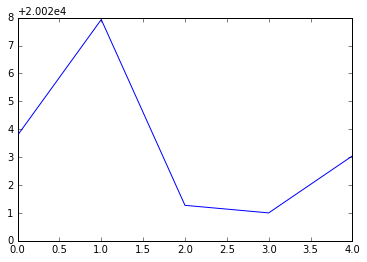

In [85]:
# print len(x)
plt.plot(x,errors_epoch)
# plt.plot(x, 1/np.log(x))

#### Momentum

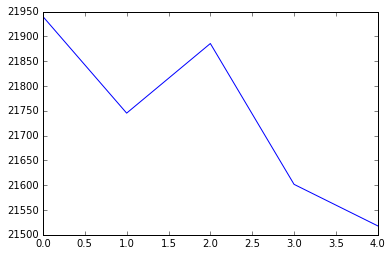

In [100]:
plt.plot(x,errors_epoch)

#### Nesterov Momentum

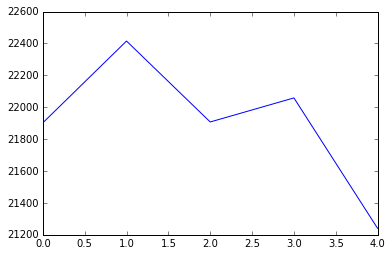

In [102]:
plt.plot(x,errors_epoch)

#### Adagrad

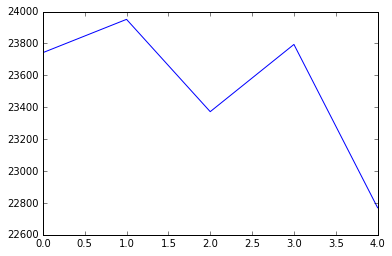

In [104]:
plt.plot(x,errors_epoch)

#### RMS prop

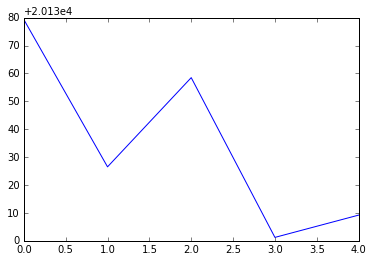

In [114]:
plt.plot(x,errors_epoch)

#### Adam

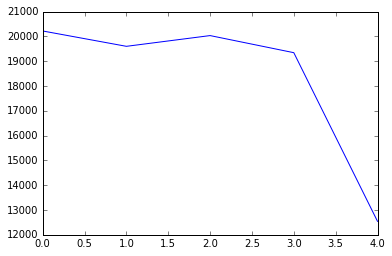

In [129]:
plt.plot(x,errors_epoch)